In [2]:
from defense import *
from utils import *
import inceptionv3
import tqdm
import time

In [3]:
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=config)

In [4]:
# the seleted data from the imagenet validation set
cleandata = np.load("./data/clean100data.npy")
cleanlabel = np.load("./data/clean100label.npy")

orig = load_image('cat.jpg')
CORRECT_ori = 282 # tiger cat
TARGET_ori = 924 # guacamole 

In [5]:
TARGET = 999 # toilet paper
sampleindex = 2

In [7]:
x = tf.placeholder(tf.float32, (299, 299, 3))
x_expanded = tf.expand_dims(x, axis=0)
logits, preds = inceptionv3.model(sess, x_expanded)

l2_x = tf.placeholder(tf.float32, (299, 299, 3))
l2_orig = tf.placeholder(tf.float32, (299, 299, 3))
normalized_l2_loss = tf.nn.l2_loss(l2_orig - l2_x) / tf.nn.l2_loss(l2_orig)

xent = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot(TARGET, 1000))
lam = tf.placeholder(tf.float32, ())
loss = xent + lam * normalized_l2_loss
grad, = tf.gradients(loss,x)

probs = tf.nn.softmax(logits)
classify = make_classify(sess, x, probs)

INFO:tensorflow:Scale of 0 disables regularizer.


# Using a strong sample to demonstrate the defense

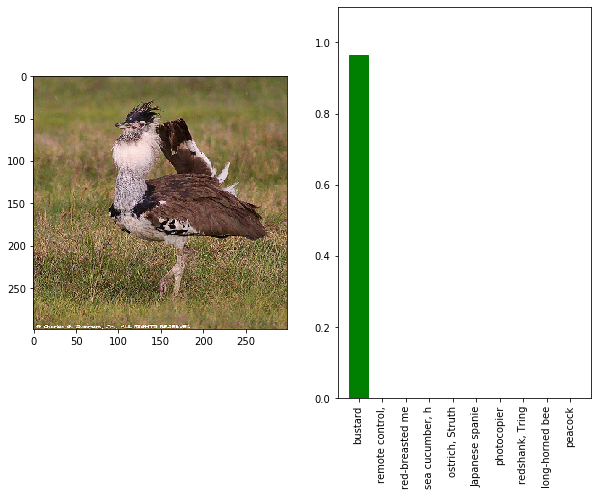

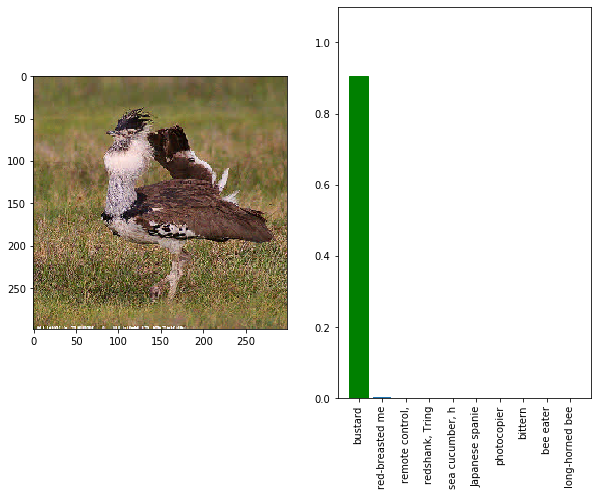

In [8]:
# demo based on a strong sample
# plot the original img and the defended version
classify(cleandata[sampleindex],correct_class=cleanlabel[sampleindex],target_class=TARGET)
classify(defend_GD(defend_FD_sig(cleandata[sampleindex]),0.25),correct_class=cleanlabel[sampleindex],target_class=TARGET)

# BPDA Failed to attack

In [13]:
# 1.Using BPDA to attack the model with RDDfense as the protection
LR = 0.1
LAM = 1.0

adv = np.copy(cleandata[sampleindex])
start = time.time()
for i in tqdm.tqdm(range(50)):
    fdedadv = defend_FD_sig(adv)
    adv_def = defend_GD(fdedadv)
    g, p = sess.run([grad, preds], {x: adv_def,lam: LAM, l2_x: adv, l2_orig: cleandata[sampleindex]})
    print('step %d, pred=%d' % (i, p))
    adv -= LR * g
    adv = np.clip(adv, 0, 1)

end = time.time()
print('total time: ' + str(end - start))

  2%|▏         | 1/50 [00:01<01:16,  1.56s/it]

step 0, pred=138


  4%|▍         | 2/50 [00:01<00:56,  1.19s/it]

step 1, pred=138


  6%|▌         | 3/50 [00:02<00:43,  1.09it/s]

step 2, pred=138


  8%|▊         | 4/50 [00:02<00:33,  1.36it/s]

step 3, pred=138


 10%|█         | 5/50 [00:02<00:27,  1.66it/s]

step 4, pred=138


 12%|█▏        | 6/50 [00:03<00:22,  1.95it/s]

step 5, pred=138


 14%|█▍        | 7/50 [00:03<00:19,  2.22it/s]

step 6, pred=138


 16%|█▌        | 8/50 [00:03<00:17,  2.46it/s]

step 7, pred=138


 18%|█▊        | 9/50 [00:03<00:15,  2.67it/s]

step 8, pred=138


 20%|██        | 10/50 [00:04<00:14,  2.83it/s]

step 9, pred=138


 22%|██▏       | 11/50 [00:04<00:13,  2.96it/s]

step 10, pred=138


 24%|██▍       | 12/50 [00:04<00:12,  3.06it/s]

step 11, pred=138


 26%|██▌       | 13/50 [00:05<00:11,  3.13it/s]

step 12, pred=138


 28%|██▊       | 14/50 [00:05<00:11,  3.18it/s]

step 13, pred=138


 30%|███       | 15/50 [00:05<00:10,  3.21it/s]

step 14, pred=138


 32%|███▏      | 16/50 [00:06<00:10,  3.15it/s]

step 15, pred=138


 34%|███▍      | 17/50 [00:06<00:10,  3.17it/s]

step 16, pred=138


 36%|███▌      | 18/50 [00:06<00:10,  3.15it/s]

step 17, pred=138


 38%|███▊      | 19/50 [00:07<00:09,  3.14it/s]

step 18, pred=138


 40%|████      | 20/50 [00:07<00:09,  3.18it/s]

step 19, pred=138


 42%|████▏     | 21/50 [00:07<00:08,  3.24it/s]

step 20, pred=138


 44%|████▍     | 22/50 [00:07<00:08,  3.28it/s]

step 21, pred=138


 46%|████▌     | 23/50 [00:08<00:08,  3.25it/s]

step 22, pred=138


 48%|████▊     | 24/50 [00:08<00:07,  3.26it/s]

step 23, pred=138


 50%|█████     | 25/50 [00:08<00:07,  3.27it/s]

step 24, pred=138


 52%|█████▏    | 26/50 [00:09<00:07,  3.35it/s]

step 25, pred=138


 54%|█████▍    | 27/50 [00:09<00:06,  3.35it/s]

step 26, pred=138


 56%|█████▌    | 28/50 [00:09<00:06,  3.32it/s]

step 27, pred=138


 58%|█████▊    | 29/50 [00:10<00:06,  3.29it/s]

step 28, pred=138


 60%|██████    | 30/50 [00:10<00:06,  3.28it/s]

step 29, pred=138


 62%|██████▏   | 31/50 [00:10<00:05,  3.34it/s]

step 30, pred=138


 64%|██████▍   | 32/50 [00:10<00:05,  3.40it/s]

step 31, pred=138


 66%|██████▌   | 33/50 [00:11<00:04,  3.46it/s]

step 32, pred=138


 68%|██████▊   | 34/50 [00:11<00:04,  3.39it/s]

step 33, pred=138


 70%|███████   | 35/50 [00:11<00:04,  3.32it/s]

step 34, pred=138


 72%|███████▏  | 36/50 [00:12<00:04,  3.29it/s]

step 35, pred=138


 74%|███████▍  | 37/50 [00:12<00:03,  3.26it/s]

step 36, pred=138


 76%|███████▌  | 38/50 [00:12<00:03,  3.25it/s]

step 37, pred=138


 78%|███████▊  | 39/50 [00:13<00:03,  3.24it/s]

step 38, pred=138


 80%|████████  | 40/50 [00:13<00:03,  3.24it/s]

step 39, pred=138


 82%|████████▏ | 41/50 [00:13<00:02,  3.22it/s]

step 40, pred=138


 84%|████████▍ | 42/50 [00:14<00:02,  3.24it/s]

step 41, pred=138


 86%|████████▌ | 43/50 [00:14<00:02,  3.25it/s]

step 42, pred=138


 88%|████████▊ | 44/50 [00:14<00:01,  3.27it/s]

step 43, pred=138


 90%|█████████ | 45/50 [00:14<00:01,  3.29it/s]

step 44, pred=138


 92%|█████████▏| 46/50 [00:15<00:01,  3.29it/s]

step 45, pred=138


 94%|█████████▍| 47/50 [00:15<00:00,  3.29it/s]

step 46, pred=138


 96%|█████████▌| 48/50 [00:15<00:00,  3.28it/s]

step 47, pred=138


 98%|█████████▊| 49/50 [00:16<00:00,  3.30it/s]

step 48, pred=138


100%|██████████| 50/50 [00:16<00:00,  3.03it/s]

step 49, pred=138
total time: 16.477442502975464


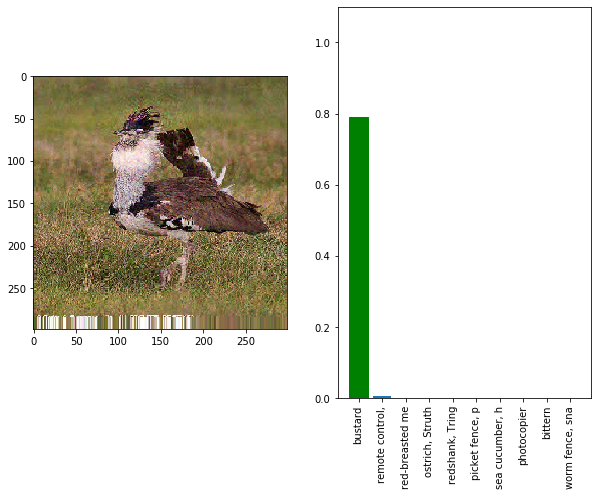

In [15]:
classify(defend_GD(defend_FD_sig(adv)),correct_class=cleanlabel[sampleindex],target_class=TARGET)

# Using a weak sample to demonstrate the defense

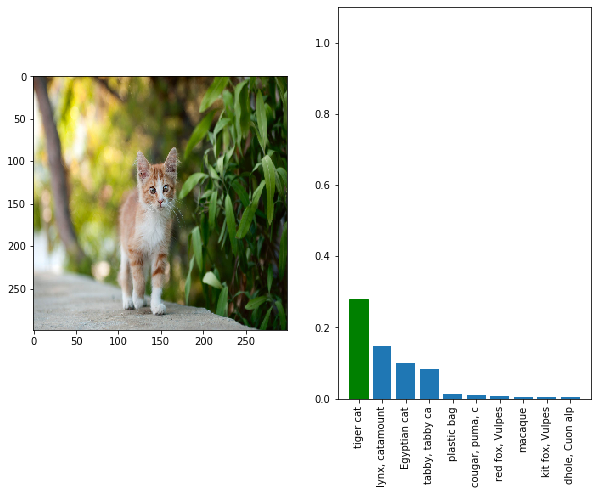

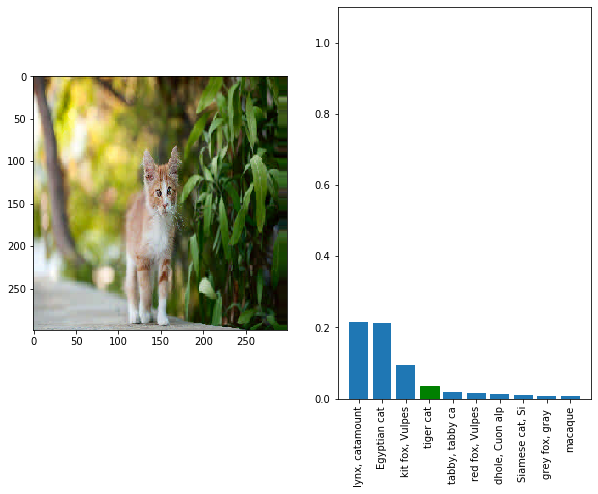

In [16]:
# demo based on a weak sample
# plot the original img and the defended version
classify(orig,correct_class=CORRECT_ori,target_class=TARGET_ori)
classify(defend_GD(defend_FD_sig(orig),0.25),correct_class=CORRECT_ori,target_class=TARGET_ori)

In [17]:
# 1.Using BPDA to attack the model with RDDfense as the protection
LR = 0.1

adv = np.copy(orig)
start = time.time()
for i in tqdm.tqdm(range(50)):
    fdedadv = defend_FD_sig(adv)
    adv_def = defend_GD(fdedadv)
    g, p = sess.run([grad, preds], {x: adv_def,lam: LAM, l2_x: adv, l2_orig: orig})
    print('step %d, pred=%d' % (i, p))
    adv -= LR * g
    adv = np.clip(adv, 0, 1)

end = time.time()
print('total time: ' + str(end - start))

  2%|▏         | 1/50 [00:00<00:15,  3.13it/s]

step 0, pred=287


  4%|▍         | 2/50 [00:00<00:15,  3.14it/s]

step 1, pred=277


  6%|▌         | 3/50 [00:00<00:14,  3.18it/s]

step 2, pred=287


  8%|▊         | 4/50 [00:01<00:14,  3.15it/s]

step 3, pred=287


 10%|█         | 5/50 [00:01<00:14,  3.14it/s]

step 4, pred=287


 12%|█▏        | 6/50 [00:01<00:14,  3.12it/s]

step 5, pred=278


 14%|█▍        | 7/50 [00:02<00:13,  3.13it/s]

step 6, pred=277


 16%|█▌        | 8/50 [00:02<00:13,  3.16it/s]

step 7, pred=287


 18%|█▊        | 9/50 [00:02<00:12,  3.18it/s]

step 8, pred=287


 20%|██        | 10/50 [00:03<00:12,  3.20it/s]

step 9, pred=278


 22%|██▏       | 11/50 [00:03<00:12,  3.23it/s]

step 10, pred=272


 24%|██▍       | 12/50 [00:03<00:11,  3.27it/s]

step 11, pred=285


 26%|██▌       | 13/50 [00:04<00:11,  3.30it/s]

step 12, pred=287


 28%|██▊       | 14/50 [00:04<00:11,  3.22it/s]

step 13, pred=280


 30%|███       | 15/50 [00:04<00:11,  3.15it/s]

step 14, pred=278


 32%|███▏      | 16/50 [00:05<00:10,  3.15it/s]

step 15, pred=277


 34%|███▍      | 17/50 [00:05<00:10,  3.15it/s]

step 16, pred=280


 36%|███▌      | 18/50 [00:05<00:10,  3.15it/s]

step 17, pred=272


 38%|███▊      | 19/50 [00:05<00:09,  3.23it/s]

step 18, pred=287


 40%|████      | 20/50 [00:06<00:09,  3.20it/s]

step 19, pred=280


 42%|████▏     | 21/50 [00:06<00:09,  3.19it/s]

step 20, pred=277


 44%|████▍     | 22/50 [00:06<00:08,  3.12it/s]

step 21, pred=287


 46%|████▌     | 23/50 [00:07<00:08,  3.13it/s]

step 22, pred=287


 48%|████▊     | 24/50 [00:07<00:08,  3.12it/s]

step 23, pred=287


 50%|█████     | 25/50 [00:07<00:07,  3.13it/s]

step 24, pred=277


 52%|█████▏    | 26/50 [00:08<00:07,  3.13it/s]

step 25, pred=287


 54%|█████▍    | 27/50 [00:08<00:07,  3.15it/s]

step 26, pred=272


 56%|█████▌    | 28/50 [00:08<00:06,  3.16it/s]

step 27, pred=287


 58%|█████▊    | 29/50 [00:09<00:06,  3.16it/s]

step 28, pred=287


 60%|██████    | 30/50 [00:09<00:06,  3.17it/s]

step 29, pred=278


 62%|██████▏   | 31/50 [00:09<00:05,  3.17it/s]

step 30, pred=287


 64%|██████▍   | 32/50 [00:10<00:05,  3.17it/s]

step 31, pred=278


 66%|██████▌   | 33/50 [00:10<00:05,  3.16it/s]

step 32, pred=280


 68%|██████▊   | 34/50 [00:10<00:05,  3.16it/s]

step 33, pred=280


 70%|███████   | 35/50 [00:11<00:04,  3.15it/s]

step 34, pred=287


 72%|███████▏  | 36/50 [00:11<00:04,  3.16it/s]

step 35, pred=373


 74%|███████▍  | 37/50 [00:11<00:04,  3.16it/s]

step 36, pred=287


 76%|███████▌  | 38/50 [00:11<00:03,  3.17it/s]

step 37, pred=287


 78%|███████▊  | 39/50 [00:12<00:03,  3.18it/s]

step 38, pred=287


 80%|████████  | 40/50 [00:12<00:03,  3.27it/s]

step 39, pred=287


 82%|████████▏ | 41/50 [00:12<00:02,  3.25it/s]

step 40, pred=280


 84%|████████▍ | 42/50 [00:13<00:02,  3.20it/s]

step 41, pred=287


 86%|████████▌ | 43/50 [00:13<00:02,  3.22it/s]

step 42, pred=287


 88%|████████▊ | 44/50 [00:13<00:01,  3.23it/s]

step 43, pred=287


 90%|█████████ | 45/50 [00:14<00:01,  3.24it/s]

step 44, pred=280


 92%|█████████▏| 46/50 [00:14<00:01,  3.25it/s]

step 45, pred=287


 94%|█████████▍| 47/50 [00:14<00:00,  3.25it/s]

step 46, pred=287


 96%|█████████▌| 48/50 [00:15<00:00,  3.24it/s]

step 47, pred=287


 98%|█████████▊| 49/50 [00:15<00:00,  3.25it/s]

step 48, pred=287


100%|██████████| 50/50 [00:15<00:00,  3.19it/s]

step 49, pred=287
total time: 15.680570125579834


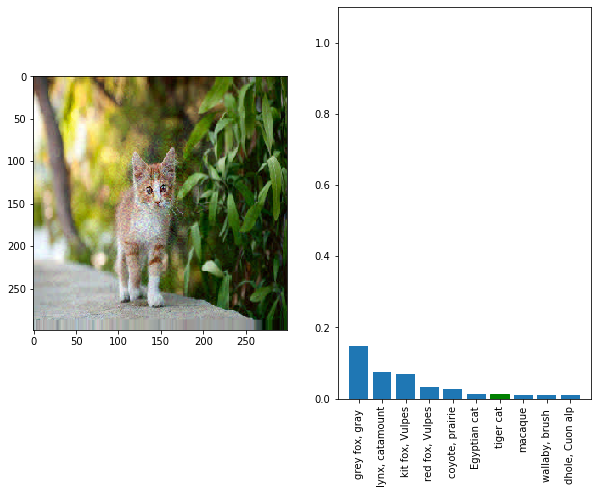

In [18]:
classify(defend_GD(defend_FD_sig(adv)),correct_class=CORRECT_ori,target_class=TARGET_ori)